# 절단시간 예측하기 

In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [ ]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

In [60]:
Data = pd.read_csv("cutting.csv",encoding='utf-8')
Data

,Unnamed: 0,절단 길이 (m),절단갯수,절단시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,...,작업장_21,작업장_22,작업장_23,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963
0,0,21.9,1,827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,111.8,46,2906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,33.5,2,1003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,174.9,35,4412,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,66.6,7,1601,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,149263,124.0,33,3077,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144403,149264,162.0,31,2899,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144404,149265,28.9,56,930,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144405,149266,25.6,1,696,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
data_importance = Data.iloc[:,[0,1,2,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24,-25,-26,-27,-28,-29,-30,-31,-32,-33,-34,-35,-36,-37,-38,-39,-40,-41]]
data_importance

,절단 길이 (m),절단갯수,절단시간(초),절단장비_PS963,절단장비_PS243,절단장비_PS213,절단장비_PL974,절단장비_PL973,절단장비_PL961,절단장비_PL922,절단장비_PL921,절단장비_PL911,절단장비_PL273,절단장비_PL272,절단장비_PL271,절단장비_PL262,절단장비_PL261,절단장비_PL254,절단장비_PL253,절단장비_PL252,절단장비_PL242,절단장비_PL241,절단장비_PL234,절단장비_PL233,절단장비_PL231,절단장비_PL224,절단장비_PL223,절단장비_PL221,절단장비_PL212,절단장비_PL211,절단장비_PL142,절단장비_PL141,작업장_97,작업장_96,작업장_92,작업장_91,작업장_27,작업장_26,작업장_25,작업장_24,작업장_23,작업장_22,작업장_21,작업장_14
0,21.9,1,827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,111.8,46,2906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33.5,2,1003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,174.9,35,4412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,66.6,7,1601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,124.0,33,3077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
144403,162.0,31,2899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
144404,28.9,56,930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
144405,25.6,1,696,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
del Data['Unnamed: 0']

In [65]:
from sklearn.model_selection import train_test_split

y = Data['절단시간(초)']
x = Data.drop(['절단시간(초)'],axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)



In [66]:
# 로그스케일 안하고
model = RandomForestRegressor()
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)



0.9694142688436395
0.8318787824838728
학습률 예측률 차이 : 0.13753548635976665
rmse:  430.00301235038296


In [62]:
from sklearn.model_selection import train_test_split

y = Data['절단시간(초)']
x = Data.drop(['절단시간(초)'],axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [63]:
# 로그스케일 안하고
model = RandomForestRegressor()
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.9691178877225123
0.833927824289671
학습률 예측률 차이 : 0.13519006343284123
rmse:  427.2872191907404


In [67]:
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

model = LGBMRegressor(n_estimators = 3000, boosting = 'dart', learning_rate = 0.05, max_depth = 12) #학습률 낮추어 보기, 깊이 더 파보기
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.8745530988017606
0.8305161038882014
학습률 예측률 차이 : 0.04403699491355917
rmse:  419.96431865647395


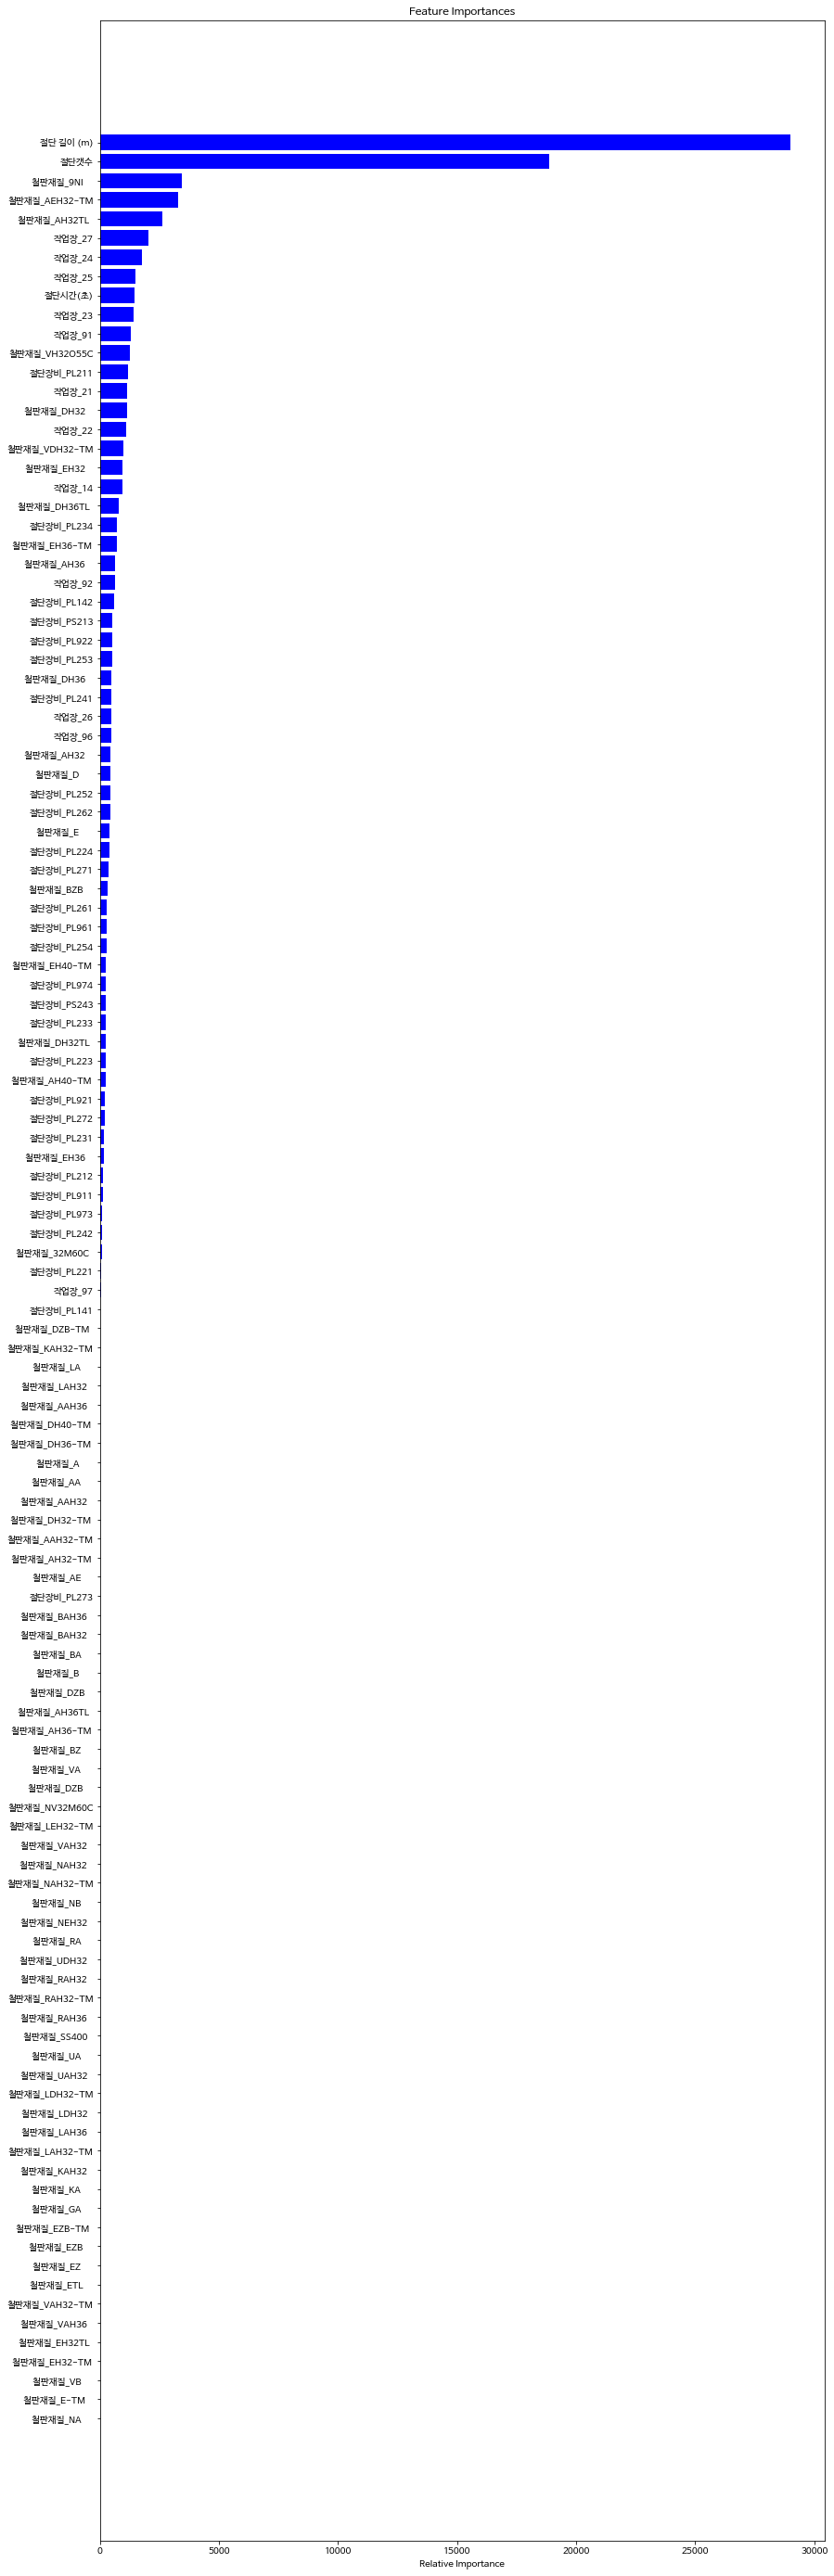

In [81]:
import matplotlib.pyplot as plt

features = Data.columns.to_list()
importances = model.feature_importances_
indices = np.argsort(importances)

plt.rcParams["figure.figsize"] = (14,50)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.yticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'num_iterations': [1000,2000,3000], 
    'learning_rate': [0.1,0.08,0.05], 
    'max_depth': [9,10,-1],  
    'booster' :['dart'],
    'scale_pos_weight' : [1.1,1.2,1.3]
}


grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

print(abs(grid_search.best_score_))
print(grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


177194.17629256795
{'booster': 'dart', 'learning_rate': 0.1, 'max_depth': 10, 'num_iterations': 1000, 'scale_pos_weight': 1.1}


In [ ]:
model = LGBMRegressor(n_estimators = 1000, boosting = 'dart', learning_rate = 0.1, max_depth = 10 , min_data_in_leaf=500,feature_fraction= 0.8, subsample = 0.8)# 이 경우추가해보기
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.8554738364109606
0.8179717184684856
학습률 예측률 차이 : 0.037502117942475044
rmse:  430.42919249336177
